<a href="https://colab.research.google.com/github/godots/DataAnalysis_OpenCollege/blob/master/Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Cloud

## Word Cloud 란?

자전차왕 엄복동처럼 단어의 빈도 수를 바탕으로 구름처럼 표현하는 것

## Word Cloud 수행순서

0. 사전준비
1. Data 불러오기
2. Data 전처리 
3. 명사 및 형용사 추출 
4. 빈도 추출 
5. WordCloud 시각화

### 2.0 WordCloud 사전준비

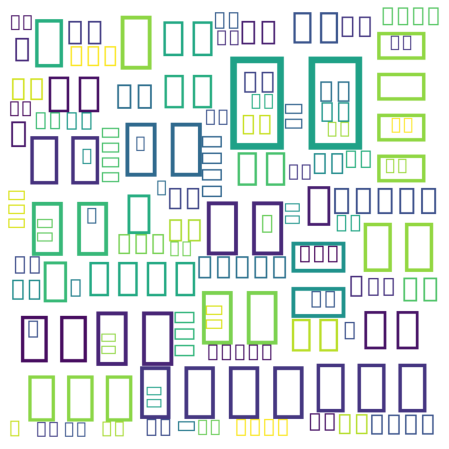

In [ ]:
# 한글 폰트 설치 - 나눔 폰트

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 제대로 잘 깔렸는지 확인

import matplotlib.font_manager as fm

sys_font = fm.findSystemFonts()

for f in sys_font:
  if 'Nanum' in f:
    print(f)

/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
/usr/share/fonts/truetype/nanum/NanumBrush.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
/usr/share/fonts/truetype/nanum/NanumPen.ttf
/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf
/usr/share/fonts/truetype/nanum/NanumSquar

### 2.1 Data 불러오기

In [ ]:
# Google Drive Mount
# Linux 명령어 Unzip을 사용하여 압축 해제

!unzip '/content/drive/MyDrive/환경 빅데이터 플랫폼 3차 교육/data/EnvBERT_데이터셋.zip'

Archive:  /content/drive/MyDrive/환경 빅데이터 플랫폼 3차 교육/data/EnvBERT_데이터셋.zip
  inflating: label_info.txt          
  inflating: README.txt              
  inflating: test_set.xlsx           
  inflating: train_set.xlsx          


In [ ]:
# 다른 방법 --> 늦게 강의에 참여하신분용
# 윗 셀 실행하지 말고 """ 삭제하신 뒤 이번 셀 수행

"""
import gdown

url = 'https://drive.google.com/uc?id=12i__-vU7n0Gq58zMbEA5vqSqX2AHLpoI'
output = 'EnvBERT_데이터셋.zip'
gdown.download(url, output, quiet=False)

!unzip 'EnvBERT_데이터셋.zip'
"""

In [ ]:
# import packages

import pandas as pd

train = pd.read_excel('train_set.xlsx')
train.head()

,id,label,text
0,3357,16,[울진 농업용 미생물 75t 연중 무료 공급]많이 본 기사
1,7485,0,[[오늘 날씨] '경칩' 영하권 꽃샘추위… 일부 지역서 눈발]체감온도가 -12도까지...
2,7434,2,"""[""""봄철 미세먼지·꽃가루로 지친 피부는 산소발생기 '오투덤 산소테라피'로""""]산..."
3,7516,0,['파란하늘 반가워']성동훈 기자 전국 대부분 미세먼지 농도가 좋음 을 나타내...
4,7517,0,[[오늘의 날씨] 전국 구름 많고 포근…미세먼지는 '나쁨']사진 연합뉴스 오늘은...


In [ ]:
# [text] Column만 이용
# 중복 값 제거 및 NA 값 제거

Data = train[['text']]
data = Data.drop_duplicates().dropna()

len(data)

4421

In [ ]:
data

,text
0,[울진 농업용 미생물 75t 연중 무료 공급]많이 본 기사
1,[[오늘 날씨] '경칩' 영하권 꽃샘추위… 일부 지역서 눈발]체감온도가 -12도까지...
2,"""[""""봄철 미세먼지·꽃가루로 지친 피부는 산소발생기 '오투덤 산소테라피'로""""]산..."
3,['파란하늘 반가워']성동훈 기자 전국 대부분 미세먼지 농도가 좋음 을 나타내...
4,[[오늘의 날씨] 전국 구름 많고 포근…미세먼지는 '나쁨']사진 연합뉴스 오늘은...
...,...
5066,"""[부여군, 친환경 굿뜨래농산물 생산 주력]농기센터 EM복합균 등 유용미생물 10..."
5067,"""[오산시,취약한 해빙기 맞아 4월 말까지 수질관리 특별점검]오산시는 수질오염사고에..."
5069,"""[美제재 불구…화웨이, 지난해 매출 148조원 '19.1% 급증']화웨이가 미국 ..."
5070,[[신년사] 차준택 인천부평구청장]존경하는 구민 여러분! 그리고 친애하는 직원 여...


### 2.2 Data 전처리

In [ ]:
# List로 변환

data_ = data.text.values.tolist()

data_[:5]

['[울진 농업용 미생물 75t 연중 무료 공급]많이 본 기사',
 "[[오늘 날씨] '경칩' 영하권 꽃샘추위… 일부 지역서 눈발]체감온도가 -12도까지 떨어진 18일 오전 서울 종로구 광화문 네거리에서 두꺼운 외투를 입은 시민들이 발걸음을 재촉하고 있다    개구리가 겨울잠에서 깨어난다는  경칩 이자 목요일인 5일은 반짝 꽃샘추위가 찾아오겠다.    기상청에 따르면 이날 북서쪽에서 찬 공기가 남하하면서 아침 최저기온이 대부분 지역에서 영하로 내려가 춥고  낮 기온은 일사에 의해 오르며 일교차가 크겠다.    아침 기온은 －6∼2도  낮 기온은 6∼12도로 평년보다 낮겠다. 특히 바람까지 불면서 아침 체감온도는 －11∼－2도로 더 낮겠다. 다만 낮이 되면 햇볕 때문에 기온이 5∼12도까지 오르겠다.    기압골의 영향으로 중부지방은 밤까지 눈이 내리고 일부 남부지방에도 곳에 따라 눈이 날리는 곳이 있겠다.    예상 적설량은 강원 산지에 1∼5㎝  강원 영서  충남 서해안  전라 서해안  전북 동부 내륙 등에 1㎝ 내외다.    미세먼지 농도는 전 권역에서  보통  수준으로 예상된다. 다만 전날 유입된 국외 미세먼지 영향으로 강원권과 대구·경북은 오전에 일시적으로  나쁨  수준을 보이겠다고 국립환경과학원은 내다봤다.",
 '"[""봄철 미세먼지·꽃가루로 지친 피부는 산소발생기 \'오투덤 산소테라피\'로""]산소발생기 기업 트리시스의 오투덤이 봄철 불청객 미세먼지와 계절에 변화로 날리는꽃가루로 트러블이 많아지는 시기에 산소테라피로 도움을 받을 수 있다고 전했다.  오투덤을 이용한 테라피는 PSAT 방식의 특수한 성분의 흡착필터를 통해 공기 중에 질소는 흡착되고  순수하게 여과된 산소만을 사용할 수 있기 때문에 피부 미용에 효과적이라는 것이 업체 측 설명이다. 이때 함께 발생하는 음이온이 피부의 호흡을 통해 체내에 공급돼 피부노화의 원인인 활성 산소를 환원시키고 피부 세포 재생을 유도하는 역할을 한다.  미세먼지로 인한 피부 트러블이 발생되면 오투덤의 고농도 산소

In [ ]:
# 정규표현식을 사용해 한글 및 숫자만 추출

import re

regex = []

for i in range(len(data)):
  text = re.sub('[^0-9ㄱ-힣]', '', str(data_[i]))
  regex.append(text)

In [ ]:
regex[:5]

['울진농업용미생물75연중무료공급많이본기사',
 '오늘날씨경칩영하권꽃샘추위일부지역서눈발체감온도가12도까지떨어진18일오전서울종로구광화문네거리에서두꺼운외투를입은시민들이발걸음을재촉하고있다개구리가겨울잠에서깨어난다는경칩이자목요일인5일은반짝꽃샘추위가찾아오겠다기상청에따르면이날북서쪽에서찬공기가남하하면서아침최저기온이대부분지역에서영하로내려가춥고낮기온은일사에의해오르며일교차가크겠다아침기온은62도낮기온은612도로평년보다낮겠다특히바람까지불면서아침체감온도는112도로더낮겠다다만낮이되면햇볕때문에기온이512도까지오르겠다기압골의영향으로중부지방은밤까지눈이내리고일부남부지방에도곳에따라눈이날리는곳이있겠다예상적설량은강원산지에15㎝강원영서충남서해안전라서해안전북동부내륙등에1㎝내외다미세먼지농도는전권역에서보통수준으로예상된다다만전날유입된국외미세먼지영향으로강원권과대구경북은오전에일시적으로나쁨수준을보이겠다고국립환경과학원은내다봤다',
 '봄철미세먼지꽃가루로지친피부는산소발생기오투덤산소테라피로산소발생기기업트리시스의오투덤이봄철불청객미세먼지와계절에변화로날리는꽃가루로트러블이많아지는시기에산소테라피로도움을받을수있다고전했다오투덤을이용한테라피는방식의특수한성분의흡착필터를통해공기중에질소는흡착되고순수하게여과된산소만을사용할수있기때문에피부미용에효과적이라는것이업체측설명이다이때함께발생하는음이온이피부의호흡을통해체내에공급돼피부노화의원인인활성산소를환원시키고피부세포재생을유도하는역할을한다미세먼지로인한피부트러블이발생되면오투덤의고농도산소이온과함께전용솔루션세트와같이케어를통해지친피부에활력을불어넣어주고보습및미백효과도얻을수있다여기에산소발생기오투덤을활용한다양한접근으로피부관리의도움받는좋은방법이기도하다현재세계10여개국으로오투덤을수출을하고있는트리시스의관계자는봄철뿐아니라실외활동후소중한피부에긍정적인영향을줄수있다고설명했다저작권자데이터넷무단전재및재배포금지',
 '파란하늘반가워성동훈기자전국대부분미세먼지농도가좋음을나타내고있는27일오후서울영등포구63스퀘어에서바라본하늘이파랗게보이고있다2020227뉴스1',
 '오늘의날씨전국구름많고포근미세먼지는나쁨사진연합뉴스오늘은전국에구름이많은가운데평년보

In [ ]:
# 뭔가 이상한데? 다시

import re

regex = []

for i in range(len(data)):
  text = re.sub('[^0-9ㄱ-힣]', ' ', str(data_[i]))
  regex.append(text)

In [ ]:
regex[:5]

[' 울진 농업용 미생물 75  연중 무료 공급 많이 본 기사',
 '  오늘 날씨   경칩  영하권 꽃샘추위  일부 지역서 눈발 체감온도가  12도까지 떨어진 18일 오전 서울 종로구 광화문 네거리에서 두꺼운 외투를 입은 시민들이 발걸음을 재촉하고 있다    개구리가 겨울잠에서 깨어난다는  경칩 이자 목요일인 5일은 반짝 꽃샘추위가 찾아오겠다     기상청에 따르면 이날 북서쪽에서 찬 공기가 남하하면서 아침 최저기온이 대부분 지역에서 영하로 내려가 춥고  낮 기온은 일사에 의해 오르며 일교차가 크겠다     아침 기온은  6 2도  낮 기온은 6 12도로 평년보다 낮겠다  특히 바람까지 불면서 아침 체감온도는  11  2도로 더 낮겠다  다만 낮이 되면 햇볕 때문에 기온이 5 12도까지 오르겠다     기압골의 영향으로 중부지방은 밤까지 눈이 내리고 일부 남부지방에도 곳에 따라 눈이 날리는 곳이 있겠다     예상 적설량은 강원 산지에 1 5㎝  강원 영서  충남 서해안  전라 서해안  전북 동부 내륙 등에 1㎝ 내외다     미세먼지 농도는 전 권역에서  보통  수준으로 예상된다  다만 전날 유입된 국외 미세먼지 영향으로 강원권과 대구 경북은 오전에 일시적으로  나쁨  수준을 보이겠다고 국립환경과학원은 내다봤다 ',
 '    봄철 미세먼지 꽃가루로 지친 피부는 산소발생기  오투덤 산소테라피 로   산소발생기 기업 트리시스의 오투덤이 봄철 불청객 미세먼지와 계절에 변화로 날리는꽃가루로 트러블이 많아지는 시기에 산소테라피로 도움을 받을 수 있다고 전했다   오투덤을 이용한 테라피는      방식의 특수한 성분의 흡착필터를 통해 공기 중에 질소는 흡착되고  순수하게 여과된 산소만을 사용할 수 있기 때문에 피부 미용에 효과적이라는 것이 업체 측 설명이다  이때 함께 발생하는 음이온이 피부의 호흡을 통해 체내에 공급돼 피부노화의 원인인 활성 산소를 환원시키고 피부 세포 재생을 유도하는 역할을 한다   미세먼지로 인한 피부 트러블이 발생되면 오투덤의 고농도 산소  

In [ ]:
# 띄어쓰기 너무 많네 다시

import re

regex = []

for i in range(len(data)):
  text = re.sub('[^0-9ㄱ-힣]', ' ', str(data_[i]))
  text = re.sub(' +',' ',text)
  regex.append(text)

In [ ]:
regex[:5]

[' 울진 농업용 미생물 75 연중 무료 공급 많이 본 기사',
 ' 오늘 날씨 경칩 영하권 꽃샘추위 일부 지역서 눈발 체감온도가 12도까지 떨어진 18일 오전 서울 종로구 광화문 네거리에서 두꺼운 외투를 입은 시민들이 발걸음을 재촉하고 있다 개구리가 겨울잠에서 깨어난다는 경칩 이자 목요일인 5일은 반짝 꽃샘추위가 찾아오겠다 기상청에 따르면 이날 북서쪽에서 찬 공기가 남하하면서 아침 최저기온이 대부분 지역에서 영하로 내려가 춥고 낮 기온은 일사에 의해 오르며 일교차가 크겠다 아침 기온은 6 2도 낮 기온은 6 12도로 평년보다 낮겠다 특히 바람까지 불면서 아침 체감온도는 11 2도로 더 낮겠다 다만 낮이 되면 햇볕 때문에 기온이 5 12도까지 오르겠다 기압골의 영향으로 중부지방은 밤까지 눈이 내리고 일부 남부지방에도 곳에 따라 눈이 날리는 곳이 있겠다 예상 적설량은 강원 산지에 1 5㎝ 강원 영서 충남 서해안 전라 서해안 전북 동부 내륙 등에 1㎝ 내외다 미세먼지 농도는 전 권역에서 보통 수준으로 예상된다 다만 전날 유입된 국외 미세먼지 영향으로 강원권과 대구 경북은 오전에 일시적으로 나쁨 수준을 보이겠다고 국립환경과학원은 내다봤다 ',
 ' 봄철 미세먼지 꽃가루로 지친 피부는 산소발생기 오투덤 산소테라피 로 산소발생기 기업 트리시스의 오투덤이 봄철 불청객 미세먼지와 계절에 변화로 날리는꽃가루로 트러블이 많아지는 시기에 산소테라피로 도움을 받을 수 있다고 전했다 오투덤을 이용한 테라피는 방식의 특수한 성분의 흡착필터를 통해 공기 중에 질소는 흡착되고 순수하게 여과된 산소만을 사용할 수 있기 때문에 피부 미용에 효과적이라는 것이 업체 측 설명이다 이때 함께 발생하는 음이온이 피부의 호흡을 통해 체내에 공급돼 피부노화의 원인인 활성 산소를 환원시키고 피부 세포 재생을 유도하는 역할을 한다 미세먼지로 인한 피부 트러블이 발생되면 오투덤의 고농도 산소 이온과 함께 전용 솔루션세트와 같이 케어를 통해 지친 피부에 활력을 불어넣어주고 보습 및 미백효과도 얻을 수 있다 여

### 2.3 명사 추출

In [ ]:
# 명사 추출하기 위해 konlpy 설치 필요

!pip install konlpy

     |████████████████████████████████| 19.4MB 50.7MB/s 
     |████████████████████████████████| 450kB 40.8MB/s 
     |████████████████████████████████| 92kB 8.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# 형태소 분석기 Okt 불러오기

from konlpy.tag import Okt

okt = Okt()

In [ ]:
# okt를 이용해 명사추출
# 약 10분정도 걸림

noun = []

for j in range(len(regex)):
  noun.append(okt.nouns(regex[j]))
  print(str(j) + "번째 수행중")

0번째 수행중
1번째 수행중
2번째 수행중
3번째 수행중
4번째 수행중
5번째 수행중
6번째 수행중
7번째 수행중
8번째 수행중
9번째 수행중
10번째 수행중
11번째 수행중
12번째 수행중
13번째 수행중
14번째 수행중
15번째 수행중
16번째 수행중
17번째 수행중
18번째 수행중
19번째 수행중
20번째 수행중
21번째 수행중
22번째 수행중
23번째 수행중
24번째 수행중
25번째 수행중
26번째 수행중
27번째 수행중
28번째 수행중
29번째 수행중
30번째 수행중
31번째 수행중
32번째 수행중
33번째 수행중
34번째 수행중
35번째 수행중
36번째 수행중
37번째 수행중
38번째 수행중
39번째 수행중
40번째 수행중
41번째 수행중
42번째 수행중
43번째 수행중
44번째 수행중
45번째 수행중
46번째 수행중
47번째 수행중
48번째 수행중
49번째 수행중
50번째 수행중
51번째 수행중
52번째 수행중
53번째 수행중
54번째 수행중
55번째 수행중
56번째 수행중
57번째 수행중
58번째 수행중
59번째 수행중
60번째 수행중
61번째 수행중
62번째 수행중
63번째 수행중
64번째 수행중
65번째 수행중
66번째 수행중
67번째 수행중
68번째 수행중
69번째 수행중
70번째 수행중
71번째 수행중
72번째 수행중
73번째 수행중
74번째 수행중
75번째 수행중
76번째 수행중
77번째 수행중
78번째 수행중
79번째 수행중
80번째 수행중
81번째 수행중
82번째 수행중
83번째 수행중
84번째 수행중
85번째 수행중
86번째 수행중
87번째 수행중
88번째 수행중
89번째 수행중
90번째 수행중
91번째 수행중
92번째 수행중
93번째 수행중
94번째 수행중
95번째 수행중
96번째 수행중
97번째 수행중
98번째 수행중
99번째 수행중
100번째 수행중
101번째 수행중
102번째 수행중
103번째 수행중
104번째 수행중
105번째 수행중
106번째 수행중
107번째 수행중
108번째 수행중
109번째 수행중
110번째 수행중


In [ ]:
noun[:2]

[['울진', '농업', '용', '미생물', '연중', '무료', '공급', '기사'],
 ['오늘',
  '날씨',
  '경칩',
  '영하',
  '꽃샘추위',
  '일부',
  '지역',
  '눈발',
  '체감온도',
  '도',
  '오전',
  '서울',
  '종로구',
  '광화문',
  '네거리',
  '외투',
  '시민',
  '발걸음',
  '재촉',
  '개구리',
  '겨울잠',
  '경칩',
  '이자',
  '목요일',
  '반짝',
  '꽃샘추위',
  '기상청',
  '날',
  '북서쪽',
  '찬',
  '공기',
  '남하',
  '아침',
  '최저',
  '기온',
  '대부분',
  '지역',
  '영하',
  '낮',
  '기온',
  '일사',
  '교차',
  '아침',
  '기온',
  '도',
  '낮',
  '기온',
  '도로',
  '평년',
  '바람',
  '불면',
  '아침',
  '체감온도',
  '도로',
  '더',
  '다만',
  '낮',
  '햇볕',
  '때문',
  '기온',
  '도',
  '기압골',
  '영향',
  '중부지방',
  '밤',
  '눈',
  '일부',
  '남부',
  '지방',
  '곳',
  '눈',
  '곳',
  '예상',
  '적설량',
  '강원',
  '산지',
  '강원',
  '영서',
  '충남',
  '서해안',
  '전라',
  '서해안',
  '전북',
  '동부',
  '내륙',
  '등',
  '내외',
  '미세먼지',
  '농도',
  '전',
  '권역',
  '보통',
  '수준',
  '예상',
  '다만',
  '전날',
  '유입',
  '국외',
  '미세먼지',
  '영향',
  '강원',
  '대구',
  '경북',
  '오전',
  '일시',
  '수준',
  '국립',
  '환경과학']]

### 2.4 빈도 추출

In [ ]:
# collections를 통해 빈도 추출

from collections import Counter

In [ ]:
# 오류 발생

count = Counter(noun)

TypeError: ignored

In [ ]:
# 리스트 안에 리스트 구조 [[]] 이것을 하나의 리스트로 만들어 줘야함

nouns = sum(noun, [])

nouns[:5]

['울진', '농업', '용', '미생물', '연중']

In [ ]:
# 빈도 수 체크 함수

count = Counter(nouns)

In [ ]:
# 가장 자주 나오는 100개 단어 표출

noun_list = count.most_common(100)

In [ ]:
noun_list

[('계약', 141953),
 ('기관', 23790),
 ('금액', 23473),
 ('업체', 23466),
 ('일자', 23449),
 ('처', 23272),
 ('방법', 23151),
 ('낙찰', 23092),
 ('발주', 22710),
 ('주식회사', 22303),
 ('용역', 19283),
 ('경기도', 19018),
 ('사업', 18714),
 ('수의계약', 18713),
 ('등', 18608),
 ('공사', 17218),
 ('교육청', 16889),
 ('것', 12920),
 ('및', 12278),
 ('수', 12154),
 ('환경', 11396),
 ('지역', 9848),
 ('관리', 9370),
 ('초등학교', 9016),
 ('한국', 8694),
 ('건설', 8681),
 ('시설', 8229),
 ('지원', 7542),
 ('교육지원청', 7191),
 ('이', 6902),
 ('기술', 6334),
 ('위해', 6053),
 ('위', 5945),
 ('산업', 5895),
 ('계획', 5804),
 ('서울특별시', 5598),
 ('설계', 5552),
 ('안전', 5297),
 ('개발', 5218),
 ('본부', 4915),
 ('실시', 4842),
 ('고', 4836),
 ('경쟁', 4759),
 ('처리', 4690),
 ('경상남도', 4612),
 ('추진', 4554),
 ('강원도', 4525),
 ('중학교', 4470),
 ('보수', 4389),
 ('경상북도', 4367),
 ('사무소', 4338),
 ('통해', 4241),
 ('센터', 4234),
 ('고등학교', 4223),
 ('개선', 4205),
 ('물', 4087),
 ('개', 3962),
 ('설치', 3925),
 ('말', 3892),
 ('정비', 3879),
 ('제한', 3822),
 ('전라남도', 3756),
 ('대한', 3754),
 ('도시', 3741),
 ('그

### 2.5 Word Cloud 표현

In [ ]:
# Python에서는 wordcloud 모듈을 통해 손쉽게 wordcloud 만들기 가능
# wordcloud 설치

!pip install wordcloud

In [ ]:
# Wordcloud와 그것을 표출할 matplotlib 호출

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Wordcloud Setting 설정

wc = WordCloud(font_path= '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', # 위에 나왔던 경로 중 원하는 폰트로 복사
               background_color = 'white',
               width = 1000,
               height = 1000,
               max_words = 100,
               max_font_size = 300)

In [ ]:
# 2.4에서 만들어둔 noun_list를 dictionary로 변환한 뒤 generate

dictionary = dict(noun_list)
wordcloud = wc.generate_from_frequencies(dictionary)

# 만약 빼고싶은단어(불용어)가 있다면


# dictionary = dict(noun_list)
# del(dictionary['계약'])
# wordcloud = wc.generate_from_frequencies(dictionary)

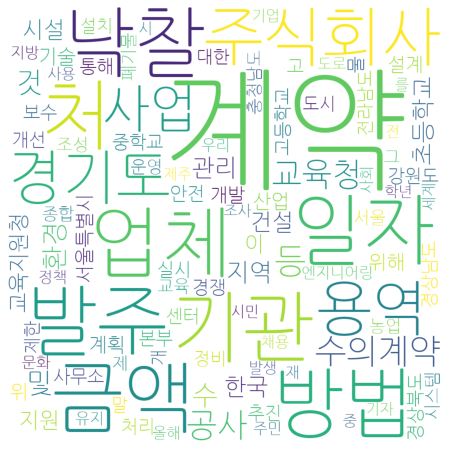

In [ ]:
# matplotlib를 통해 표출

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
# 파일로 저장

wordcloud.to_file('wordcloud_env.png')

## 실습 과제

본 코드에서는 train.xlsx를 로드 했습니다.

실습 과제에서는 test.xlsx를 로드한 뒤,

가장 많은 빈도 수를 보이는 단어 하나를 삭제하고

그 결과를 WordCloud로 나타내주세요